Points d'amélioration à corriger un jour....:
- Reprendre l'ACP sans le pays aberrant.
- Appliquer le test d'ANOVA avec le test de Student.

# Projet 5: [Produisez une étude de marché](#M0)

# Table des matières
**[I. Constitution de l'échantillon de travail](#M1)**
- [A. Sélection des variables](#M11)
    - [1) Différence de population entre 2003 et 2013](#M111)
    - [2) Disponibilité alimentaire en protéines par habitant et en calories par habitant](#M112)
    - [3) Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays](#M113)
    - [4) Importation de poulets par pays](#M114)
    - [5) Stabilité politique et sécurité](#M115)
    - [6) PIB par habitant en parité de pouvoir d'achat](#M116)
    - [7) Distances entre le France et les autres pays](#M117)
- [B. Construction du dataframe final](#M12)
    - [1) Recherche des valeurs manquantes](#M121)
    - [2) Imputation des données manquantes](#M122)

**[II. Analyse exploratoire des données](#M2)**
- [A. Première analyse](#M21)
    - [1. Détermination du nombre de composantes principales](#M211)
        - [Etude de l'inertie](#M2111)
    - [2. Classification ascendante hiérarchique](#M212)
        - [a) Dendrogramme](#M2121)
        - [b) Analyse de la classification](#M2122)
        - [c) Caractérisation des clusters](#M2123)
        - [d) Centroïdes et cartes de chaleur](#M2124)
    - [3. Analyse des composantes principales](#M213)
        - [a) Qualité de représentation des variables](#M2131)
        - [b) Contributions des individus aux axes principaux](#M2132)
        - [c) Premier plan factoriel](#M2133)
            - [i) Graphique des variables](#M21331)
            - [ii) Visualisation des partitions dans le premier plan factoriel obtenu par l'ACP](#M21332)
        - [d) Deuxième plan factoriel](#M2134)
            - [i) Graphique des variables](#M21341)
            - [ii) Partitions des 85 pays à plus forte contribution dans le deuxième plan factoriel](#M21342)
- [B. Deuxième analyse](#M22)
    - [1. Détermination du nombre de composantes principales](#M221)
        - [Etude de l'inertie](#M2211)
    - [2. Classification ascendante hiérarchique](#M222)
        - [a) Dendrogramme](#M2221)
        - [b) Analyse de la classification](#M2222)
        - [c) Caractérisation des clusters](#M2223)
        - [d) Centroïdes et cartes de chaleur](#M2224)
    - [3. Analyse des composantes principales](#M223)
        - [a) Premier plan factoriel](#M2231)
            - [i) Graphique des variables](#M22311)
            - [ii) Visualisation des partitions dans le premier plan factoriel obtenu par l'ACP](#M22332)
        
**[III. Tests statistiques](#M3)**
- [A. Test d'adéquation](#M31)
    - [1) Répartion des pays pour chaque variable centrée et réduite](#M311)
    - [2) Histogramme de distribution des variables](#M312)
    - [3) Adéquation à la loi normale](#M313)
        - [Test de Kolmogorov-Smirnov](#M3131)
        - [Test de Jarque-Bera](#M3132)
- [B) Test de comparaison de deux populations (dans le cas Gaussien)](#M32)
    - [1. Test de normalité des échantillons](#M321)
        - [Test de Shapiro-Wilk](#M3211)
    - [2) Test de Fisher - Test d'adéquation de la variance](#M322)
    - [3) Test de Student - Test d'adéquation de la moyenne](#M323)

In [1]:
library(tibble)
library(dplyr) # manipulation de tables
library(tidyr)
library(FactoMineR) # CAH
library(factoextra) # visualisation ACP
library(missMDA)  # imputation des valeurs manquantes pour l'ACP
library(ggplot2)  # graphes
library(corrplot) # tableau de contingences
library(repr)     # options graphes
library(reshape2) # commande melt (heatmap)
library(EnvStats) # test F
library(normtest) # test de Jarque-Bera

Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'FactoMineR' was built under R version 3.6.3"Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'missMDA' was built under R version 3.6.3"Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'reshape2' was built under R version 3.6.3"
Attaching package: 'reshape2'

The following

In [2]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

# I. Construction de l'échantillon de travail.<a name="M1"></a>
## <span style='color:red'>A. Sélection des variables.<a name="M11"></a>
### <span style='color:blue'>1) Différence de population entre 2003 et 2013:<a name="M111"></a>

In [3]:
population <- read.csv('Fichiers_csv/Population.csv', encoding = 'UTF-8')
head(population, 1)

Code.Domaine,Domaine,Code.Pays,Pays,Code.Élément,Élément,Code.Produit,Produit,Code.Année,Année,Unité,Valeur,Symbole,Description.du.Symbole
FBS,Bilans Alimentaires,2,Afghanistan,511,Population totale,2501,Population,2003,2003,1000 personnes,23116,,Donnée officielle


In [4]:
population <- population[, c(4, 10, 12)]
population$Valeur <- population$Valeur*1000
head(population)

Pays,Année,Valeur
Afghanistan,2003,23116000
Afghanistan,2013,30552000
Afrique du Sud,2003,46869000
Afrique du Sud,2013,52776000
Albanie,2003,3239000
Albanie,2013,3173000


In [5]:
population <- spread(population, Année, Valeur) # table pivot
population %>% head()

Pays,2003,2013
Afghanistan,23116000,30552000
Afrique du Sud,46869000,52776000
Albanie,3239000,3173000
Algérie,33003000,39208000
Allemagne,83788000,82727000
Angola,15421000,21472000


In [6]:
population <- population %>% mutate('Evolution population (%)' = round((population[,3] - population[,2])/population[,2]*100, 2)) %>% select(Pays, 'Evolution population (%)')
population %>% head()

Pays,Evolution population (%)
Afghanistan,32.17
Afrique du Sud,12.60
Albanie,-2.04
Algérie,18.80
Allemagne,-1.27
Angola,39.24


### <span style='color:blue'>2) Disponibilité alimentaire en protéines par habitant et en calories par habitant:<a name="M112"></a>

In [7]:
dispo <- read.csv('Fichiers_csv/Dispo alim calorie et prot total.csv', encoding = 'UTF-8')
head(dispo, 1)

Code.Domaine,Domaine,Code.Pays,Pays,Code.Élément,Élément,Code.Produit,Produit,Code.Année,Année,Unité,Valeur,Symbole,Description.du.Symbole
FBS,Bilans Alimentaires,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2901,Total General,2009,2009,Kcal/personne/jour,2081,Fc,Donnée calculée


In [8]:
summary(dispo)

 Code.Domaine                Domaine       Code.Pays                 Pays     
 FBS:1754     Bilans Alimentaires:1754   Min.   :  1.0   Afghanistan   :  10  
                                         1st Qu.: 63.0   Afrique du Sud:  10  
                                         Median :121.0   Albanie       :  10  
                                         Mean   :126.5   Algérie       :  10  
                                         3rd Qu.:189.0   Allemagne     :  10  
                                         Max.   :351.0   Angola        :  10  
                                                         (Other)       :1694  
  Code.Élément                                                     Élément   
 Min.   :664   Disponibilité alimentaire (Kcal/personne/jour)          :877  
 1st Qu.:664   Disponibilité de protéines en quantité (g/personne/jour):877  
 Median :669                                                                 
 Mean   :669                                            

In [9]:
dispo <- dispo[, c(4, 6, 10:12)]
dispo <- dispo %>% group_by(Pays, Élément) %>% summarise(Valeur = mean(Valeur, na.rm = T))
dispo <- spread(dispo, Élément, Valeur)
dispo[, 3] <- round(dispo[, 3], 1)
names(dispo)[2] <- 'Dispo alim (Kcal/pers/jr)'
names(dispo)[3] <- 'Dispo prot en qtt (g/pers/jr)'
dispo %>% head()

`summarise()` regrouping output by 'Pays' (override with `.groups` argument)


Pays,Dispo alim (Kcal/pers/jr),Dispo prot en qtt (g/pers/jr)
Afghanistan,2096.4,58.4
Afrique du Sud,2993.2,83.2
Albanie,3115.6,108.0
Algérie,3207.4,88.9
Allemagne,3511.4,102.2
Angola,2382.4,54.8


### <span style='color:blue'>3) Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays:<a name="M113"></a>

In [10]:
dispo_prot <- read.csv('Fichiers_csv/Protéine origine animale.csv', encoding = 'UTF-8')
head(dispo_prot, 1)

Code.Domaine,Domaine,Code.Pays,Pays,Code.Élément,Élément,Code.Produit,Produit,Code.Année,Année,Unité,Valeur,Symbole,Description.du.Symbole
FBS,Bilans Alimentaires,2,Afghanistan,674,Disponibilité de protéines en quantité (g/personne/jour),2941,Produits Animaux,2009,2009,g/personne/jour,11.68,Fc,Donnée calculée


In [11]:
dispo_prot <- dispo_prot[, c(4, 6, 8, 10:12)]
dispo_prot <- dispo_prot %>% group_by(Pays) %>% summarise('Disponibilité de protéines d\'origine animale (en g/pers/jour)' = round(mean(Valeur, na.rm = T),2))
names(dispo_prot)[2] <- 'Dispo prot origine animale (g/pers/jr)'
head(dispo_prot)

`summarise()` ungrouping output (override with `.groups` argument)


Pays,Dispo prot origine animale (g/pers/jr)
Afghanistan,12.09
Afrique du Sud,34.55
Albanie,57.18
Algérie,24.10
Allemagne,61.94
Angola,16.97


In [12]:
prop_prot <- merge(dispo_prot, dispo[, -c(2)], by = 'Pays')
prop_prot <- prop_prot %>% mutate('Prot origine animale/qtt totale (%)' = round(prop_prot[, 2]/prop_prot[, 3]*100, 1)) %>% select(Pays, 'Prot origine animale/qtt totale (%)')
head(prop_prot)

Pays,Prot origine animale/qtt totale (%)
Afghanistan,20.7
Afrique du Sud,41.5
Albanie,52.9
Algérie,27.1
Allemagne,60.6
Angola,31.0


### <span style='color:blue'>4) Importation de volailles par pays:<a name="M114"></a>

In [13]:
importation <- read.csv('Fichiers_csv/Importations volailles.csv', encoding = 'UTF-8')
head(importation, 1)

Code.Domaine,Domaine,Code.Pays,Pays,Code.Élément,Élément,Code.Produit,Produit,Code.Année,Année,Unité,Valeur,Symbole,Description.du.Symbole
FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2009,2009,Milliers de tonnes,23,S,Données standardisées


In [14]:
importation <- importation[, c(4, 10, 12)]
importation <- importation %>% group_by(Pays) %>% summarise('Importations (milliers de tonnes)' = round(mean(Valeur, na.rm = T), 1)) %>% select(Pays, 'Importations (milliers de tonnes)')
head(importation)

`summarise()` ungrouping output (override with `.groups` argument)


Pays,Importations (milliers de tonnes)
Afghanistan,36.6
Afrique du Sud,302.2
Albanie,25.6
Algérie,2.0
Allemagne,766.4
Angola,270.4


### <span style='color:blue'>5) Stabilité politique et sécurité:<a name="M115"></a>

In [15]:
stabilite <- read.csv('Fichiers_csv/Stabilité politique.csv', encoding = 'UTF-8')
head(stabilite, 1)

Code.Domaine,Domaine,Code.zone,Zone,Code.Élément,Élément,Code.Produit,Produit,Code.année,Année,Unité,Valeur,Symbole,Description.du.Symbole,Note
FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/terrorisme (indice),2014,2014,indice,-2.41,X,Sources internationales sûres,NA


In [16]:
stabilite <- stabilite[, c(4, 8, 10:12) ]
names(stabilite)[1] <- 'Pays'
stabilite <- stabilite[, -c(2,4)]
stabilite <- stabilite %>% group_by(Pays) %>% summarise('Stabilité politique (indice)' = round(mean(Valeur, na.rm = T),2))
head(stabilite)

`summarise()` ungrouping output (override with `.groups` argument)


Pays,Stabilité politique (indice)
Afghanistan,-2.61
Afrique du Sud,-0.19
Albanie,0.40
Algérie,-1.08
Allemagne,0.72
Andorre,1.38


### <span style='color:blue'>6) PIB par habitant en parité de pouvoir d'achat:<a name="M116"></a>

In [17]:
pib_ppa <- read.csv('Fichiers_csv/PIB par habitant PPA.csv', encoding = 'UTF-8')
head(pib_ppa, 1)

Code.Domaine,Domaine,Code.zone,Zone,Code.Élément,Élément,Code.Produit,Produit,Code.année,Année,Unité,Valeur,Symbole,Description.du.Symbole,Note
FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux constants de 2011)",2014,2014,I$,1795.7,X,Sources internationales sûres,NA


In [18]:
names(pib_ppa)[4] <- 'Pays'
pib_ppa <- pib_ppa[, c(4, 12)]
pib_ppa <- pib_ppa %>% group_by(Pays) %>% summarise('PIB/hab PPA (I$)' = mean(Valeur, na.rm = T)) %>% select(Pays, 'PIB/hab PPA (I$)')
head(pib_ppa)

`summarise()` ungrouping output (override with `.groups` argument)


Pays,PIB/hab PPA (I$)
Afghanistan,1762.50
Afrique du Sud,12273.44
Albanie,11427.56
Algérie,13805.12
Allemagne,44760.02
Angola,6297.34


### <span style='color:blue'>7) Distances entre la France et les autres pays:<a name="M117"></a>

In [19]:
distances <- read.csv('Fichiers_csv/Distances.csv', encoding = 'UTF-8')
distances <- distances %>% select(X, FRA)
colnames(distances) <- c('Pays', 'Distances (km)')
distances[2] <- round(distances[2])
nrow(distances)
head(distances)

[1] 235

Pays,Distances (km)
ABW,7677
AFG,5594
AGO,6479
AIA,6711
ALB,1604
AND,708


In [20]:
abreviation <- read.csv('Fichiers_csv/Abréviation pays.csv', header = T, encoding = 'UTF-8')
nrow(abreviation)
head(abreviation)

[1] 252

Pays,Nom
ABW,Aruba
AFG,Afghanistan
AGO,Angola
AIA,Anguilla
ALA,Åland
ALB,Albanie


In [21]:
distances <- merge(distances, abreviation, by = 'Pays')
distances <- distances[, c('Nom', 'Distances (km)')]
names(distances)[1] <- 'Pays'
nrow(distances)
head(distances)

[1] 235

Pays,Distances (km)
Aruba,7677
Afghanistan,5594
Angola,6479
Anguilla,6711
Albanie,1604
Andorre,708


## <span style='color:red'>B. Construction du dataframe final.<a name="M12"></a>

In [22]:
# Pour éviter un message d'avertissement concernant une conversion contrainte des colonnes 'Pays' en vecteur de caratères:
population$Pays <- as.character(population$Pays)
dispo$Pays <- as.character(dispo$Pays)
prop_prot$Pays <- as.character(prop_prot$Pays)
pib_ppa$Pays <- as.character(pib_ppa$Pays)
importation$Pays <- as.character(importation$Pays)
stabilite$Pays <- as.character(stabilite$Pays)
distances$Pays <- as.character(distances$Pays)

In [23]:
echantillon <- population %>% full_join(dispo, by = 'Pays') %>% full_join(prop_prot, by = 'Pays') %>% full_join(pib_ppa, by = 'Pays') %>% full_join(importation, by = 'Pays') %>% full_join(stabilite, by = 'Pays') %>% full_join(distances, by = 'Pays')
echantillon <- echantillon[order(echantillon$Pays), ]
echantillon$Pays[echantillon$Pays == 'République démocratique populaire lao'] <- 'Laos'
nrow(echantillon)
head(echantillon, 15)

[1] 244

,Pays,Evolution population (%),Dispo alim (Kcal/pers/jr),Dispo prot en qtt (g/pers/jr),Prot origine animale/qtt totale (%),PIB/hab PPA (I$),Importations (milliers de tonnes),Stabilité politique (indice),Distances (km)
1,Afghanistan,32.17,2096.4,58.4,20.7,1762.50,36.6,-2.61,5594
2,Afrique du Sud,12.60,2993.2,83.2,41.5,12273.44,302.2,-0.19,9307
3,Albanie,-2.04,3115.6,108.0,52.9,11427.56,25.6,0.40,1604
4,Algérie,18.80,3207.4,88.9,27.1,13805.12,2.0,-1.08,1345
5,Allemagne,-1.27,3511.4,102.2,60.6,44760.02,766.4,0.72,881
199,Andorre,NA,NA,NA,NA,NA,NA,1.38,708
6,Angola,39.24,2382.4,54.8,31.0,6297.34,270.4,-0.36,6479
206,Anguilla,NA,NA,NA,NA,NA,NA,NA,6711
207,Antarctique,NA,NA,NA,NA,NA,NA,NA,16705
7,Antigua-et-Barbuda,11.11,2343.4,82.5,69.1,22253.02,6.6,0.90,6711


### <span style='color:blue'>1) Recherche des valeurs manquantes:<a name="M121"></a>

In [24]:
# Elimination des pays dont les valeurs des 4 variables exigées sont manquantes:
echantillon <- echantillon[complete.cases(echantillon[, 2:5]), ] # élimine les valeurs manquantes des colonnes sélectionnées
rownames(echantillon) <- 1:nrow(echantillon)
nrow(echantillon)
head(echantillon, 10)

[1] 172

Pays,Evolution population (%),Dispo alim (Kcal/pers/jr),Dispo prot en qtt (g/pers/jr),Prot origine animale/qtt totale (%),PIB/hab PPA (I$),Importations (milliers de tonnes),Stabilité politique (indice),Distances (km)
Afghanistan,32.17,2096.4,58.4,20.7,1762.50,36.6,-2.61,5594
Afrique du Sud,12.60,2993.2,83.2,41.5,12273.44,302.2,-0.19,9307
Albanie,-2.04,3115.6,108.0,52.9,11427.56,25.6,0.40,1604
Algérie,18.80,3207.4,88.9,27.1,13805.12,2.0,-1.08,1345
Allemagne,-1.27,3511.4,102.2,60.6,44760.02,766.4,0.72,881
Angola,39.24,2382.4,54.8,31.0,6297.34,270.4,-0.36,6479
Antigua-et-Barbuda,11.11,2343.4,82.5,69.1,22253.02,6.6,0.90,6711
Arabie saoudite,26.16,3151.6,88.8,42.4,49632.40,748.8,-0.50,4687
Argentine,9.15,3174.8,100.6,64.8,18810.18,7.6,0.10,11025
Arménie,-1.94,2837.0,86.4,46.8,8441.40,33.4,-0.48,3439


In [25]:
str(echantillon)

'data.frame':	172 obs. of  9 variables:
 $ Pays                               : chr  "Afghanistan" "Afrique du Sud" "Albanie" "Algérie" ...
 $ Evolution population (%)           : num  32.17 12.6 -2.04 18.8 -1.27 ...
 $ Dispo alim (Kcal/pers/jr)          : num  2096 2993 3116 3207 3511 ...
 $ Dispo prot en qtt (g/pers/jr)      : num  58.4 83.2 108 88.9 102.2 ...
 $ Prot origine animale/qtt totale (%): num  20.7 41.5 52.9 27.1 60.6 31 69.1 42.4 64.8 46.8 ...
 $ PIB/hab PPA (I$)                   : num  1762 12273 11428 13805 44760 ...
 $ Importations (milliers de tonnes)  : num  36.6 302.2 25.6 2 766.4 ...
 $ Stabilité politique (indice)       : num  -2.61 -0.19 0.4 -1.08 0.72 -0.36 0.9 -0.5 0.1 -0.48 ...
 $ Distances (km)                     : num  5594 9307 1604 1345 881 ...


In [26]:
# Nombre de valeurs manquantes:
sum(is.na(echantillon))
# Affichage uniquement des pays dont les valeurs sont manquantes:
echantillon[is.na(echantillon[, c(6)]) | is.na(echantillon[, c(7)]) | is.na(echantillon[, c(8)]) | is.na(echantillon[, c(9)]), ]

[1] 19

,Pays,Evolution population (%),Dispo alim (Kcal/pers/jr),Dispo prot en qtt (g/pers/jr),Prot origine animale/qtt totale (%),PIB/hab PPA (I$),Importations (milliers de tonnes),Stabilité politique (indice),Distances (km)
21,Bermudes,1.56,2672.4,89.5,69.4,NA,4.4,0.98,5758
26,Brunéi Darussalam,18.08,2936.4,88.1,55.6,73643.66,2.0,1.21,NA
34,Chine,6.31,3065.0,95.8,39.8,14663.98,1869.6,NA,9284
37,"Chine, continentale",6.35,3065.4,95.7,39.4,14413.86,563.8,-0.46,NA
38,"Chine, Taiwan Province de",3.98,2961.6,88.3,48.6,NA,149.0,0.88,9847
45,Cuba,0.18,3286.6,85.4,35.8,NA,168.6,0.64,7733
47,Djibouti,15.63,2517.8,63.8,22.0,NA,2.6,-0.64,5585
112,Namibie,16.25,2104.6,59.1,37.6,NA,13.4,NA,8044
118,Nouvelle-Calédonie,15.84,2833.2,86.3,60.5,NA,10.0,NA,16741
130,Polynésie française,11.24,2928.0,97.7,66.0,NA,14.8,NA,15715


In [27]:
sum(is.na(echantillon['Distances (km)']))

[1] 6

In [28]:
# Recherche des distances entre Paris et les capitales de chaque valeur manquante de la table "detail_NA":
echantillon[26, 9] <- 11230
echantillon[37, 9] <- 8219
echantillon[134, 9] <- 8967
echantillon[136, 9] <- 9400
echantillon[138, 9] <- 8779
echantillon[143, 9] <- 6994
sum(is.na(echantillon))

[1] 13

In [29]:
sum(is.na(echantillon['PIB/hab PPA (I$)']))

[1] 8

In [30]:
# D'après le "CIA World Factbook 2017", données correspondantes au PIB/habitant PPA (en I$) des valeurs manquantes:
echantillon[21, 6] <- 85700
echantillon[38, 6] <- 49800
echantillon[45, 6] <- 11900
echantillon[47, 6] <- 3600
echantillon[112, 6] <- 11500
echantillon[118, 6] <- 31100
echantillon[130, 6] <- 17000
echantillon[138, 6] <- 1700
sum(is.na(echantillon))

[1] 5

In [31]:
# Affichage des valeurs manquantes:
echantillon[is.na(echantillon[, c(6)]) | is.na(echantillon[, c(7)]) | is.na(echantillon[, c(8)]) | is.na(echantillon[, c(9)]),]

,Pays,Evolution population (%),Dispo alim (Kcal/pers/jr),Dispo prot en qtt (g/pers/jr),Prot origine animale/qtt totale (%),PIB/hab PPA (I$),Importations (milliers de tonnes),Stabilité politique (indice),Distances (km)
34,Chine,6.31,3065.0,95.8,39.8,14663.98,1869.6,NA,9284
112,Namibie,16.25,2104.6,59.1,37.6,11500.00,13.4,NA,8044
118,Nouvelle-Calédonie,15.84,2833.2,86.3,60.5,31100.00,10.0,NA,16741
130,Polynésie française,11.24,2928.0,97.7,66.0,17000.00,14.8,NA,15715
138,République populaire démocratique de Corée,6.17,2095.2,55.8,17.8,1700.00,NA,-0.86,8779


In [32]:
# Observation de la Chine et ses quatre régions:
echantillon[grepl('Chine', echantillon$Pays),]

,Pays,Evolution population (%),Dispo alim (Kcal/pers/jr),Dispo prot en qtt (g/pers/jr),Prot origine animale/qtt totale (%),PIB/hab PPA (I$),Importations (milliers de tonnes),Stabilité politique (indice),Distances (km)
34,Chine,6.31,3065.0,95.8,39.8,14663.98,1869.6,NA,9284
35,Chine - RAS de Hong-Kong,4.30,3268.2,126.7,72.2,54842.30,1141.0,0.95,9646
36,Chine - RAS de Macao,25.50,2877.0,93.2,65.7,108524.64,16.0,1.32,9615
37,"Chine, continentale",6.35,3065.4,95.7,39.4,14413.86,563.8,-0.46,8219
38,"Chine, Taiwan Province de",3.98,2961.6,88.3,48.6,49800.00,149.0,0.88,9847


In [33]:
# Le choix est fait de retirer le cas global de la Chine (que l'on garde dans une table séparée):
echantillon <- echantillon[-c(34), ]
chine <- echantillon[c(34), ]

In [34]:
# On passe la colonne 'Pays' en index:
rownames(echantillon) <- echantillon$Pays
echantillon <- echantillon[, -1]
dim(echantillon)
head(echantillon)

[1] 171   8

,Evolution population (%),Dispo alim (Kcal/pers/jr),Dispo prot en qtt (g/pers/jr),Prot origine animale/qtt totale (%),PIB/hab PPA (I$),Importations (milliers de tonnes),Stabilité politique (indice),Distances (km)
Afghanistan,32.17,2096.4,58.4,20.7,1762.50,36.6,-2.61,5594
Afrique du Sud,12.60,2993.2,83.2,41.5,12273.44,302.2,-0.19,9307
Albanie,-2.04,3115.6,108.0,52.9,11427.56,25.6,0.40,1604
Algérie,18.80,3207.4,88.9,27.1,13805.12,2.0,-1.08,1345
Allemagne,-1.27,3511.4,102.2,60.6,44760.02,766.4,0.72,881
Angola,39.24,2382.4,54.8,31.0,6297.34,270.4,-0.36,6479


### <span style='color:blue'>2) Imputation des données manquantes.<a name="M122"></a>

Ici on se sert des commandes de la librairie MissMDA.

L'imputation par ces commandes est plus intéressante à réaliser qu'une imputation "classique" par la moyenne (ou par la médiane) car elle procède par recoupement des ressemblances des individus et des liaisons des variables, faisant en sorte que les valeurs imputées n'aient aucune influence sur les résultats de l'analyse factorielle.

In [35]:
nb <- estim_ncpPCA(echantillon, ncp.min = 0, ncp.max = 5, method.cv = 'Kfold')
nb

  |======================================================================| 100%


$ncp
[1] 4

$criterion
         0          1          2          3          4          5 
3147074391 1619602975 1645146108 1383839006 1272968087 1388407396

In [36]:
res.impute <- imputePCA(echantillon, ncp = 4)

In [37]:
summary(res.impute)

            Length Class  Mode   
completeObs 1368   -none- numeric
fittedX     1368   -none- numeric

In [38]:
sum(is.na(res.impute$completeObs)) # Aucune valeur manquante.

[1] 0

In [39]:
# Vérification de la vraissemblance des valeurs imputés:
res.impute$completeObs[c('Namibie', 'Nouvelle-Calédonie', 'Polynésie française', 'République populaire démocratique de Corée'), ]

,Evolution population (%),Dispo alim (Kcal/pers/jr),Dispo prot en qtt (g/pers/jr),Prot origine animale/qtt totale (%),PIB/hab PPA (I$),Importations (milliers de tonnes),Stabilité politique (indice),Distances (km)
Namibie,16.25,2104.6,59.1,37.6,11500,13.400000,-0.287095,8044
Nouvelle-Calédonie,15.84,2833.2,86.3,60.5,31100,10.000000,1.348164,16741
Polynésie française,11.24,2928.0,97.7,66.0,17000,14.800000,1.310506,15715
République populaire démocratique de Corée,6.17,2095.2,55.8,17.8,1700,4.691018,-0.860000,8779


# II. Analyse exploratoire des données.<a name="M2"></a>
## <span style='color:red'>A. Première analyse.<a name="M21"></a>
### <span style='color:purple'>1) Détermination du nombre de composantes principales.<a name="M211"></a>
### <span style='color:blue'>Etude de l'inertie:<a name="M2111"></a>

In [40]:
match('France', rownames(echantillon)) # permet d'obtenir l'index de l'individu 'France'.

[1] 60

In [41]:
echantillon[60, ] # vérification

,Evolution population (%),Dispo alim (Kcal/pers/jr),Dispo prot en qtt (g/pers/jr),Prot origine animale/qtt totale (%),PIB/hab PPA (I$),Importations (milliers de tonnes),Stabilité politique (indice),Distances (km)
France,6.22,3504.4,111.6,63.1,38404.16,393.6,0.13,0


Remarque importante: Toutes nos variables sont quantitatives. Nous pouvons donc appliquer une ACP classique.

In [42]:
res.pca <- PCA(res.impute$completeObs, ncp = 8, scale.unit = TRUE, ind.sup = 60, graph = F) # On place la France en individu supplémentaire.

In [43]:
names(res.pca)

[1] "eig"     "var"     "ind"     "svd"     "ind.sup" "call"

On regarde le gain d'inertie de chaque dimension en étudiant les valeurs propres de ses dernières afin de déterminer un nombre judiceux de composantes principales.

In [44]:
eig.val <- get_eigenvalue(res.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,3.7683025,47.103781,47.10378
Dim.2,1.2605583,15.756979,62.86076
Dim.3,1.0386109,12.982636,75.84340
Dim.4,0.8527340,10.659175,86.50257
Dim.5,0.4523829,5.654787,92.15736
Dim.6,0.2934585,3.668231,95.82559
Dim.7,0.2339463,2.924329,98.74992
Dim.8,0.1000066,1.250083,100.00000


CCL: Selon le critère de Kaiser en ACP normée, nous retenons les axes dont les valeurs propres sont supérieurs à 1.

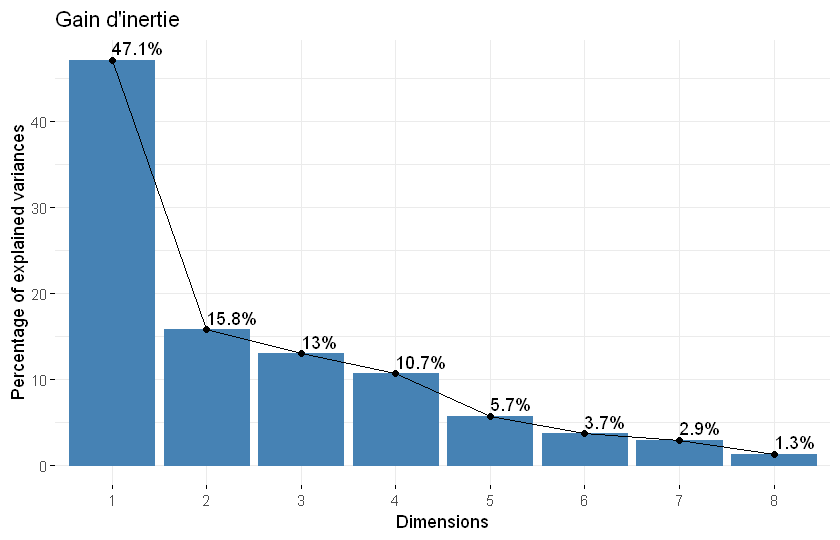

In [45]:
options(repr.plot.width = 7, repr.plot.height = 4.5)
fviz_eig(res.pca, addlabels = TRUE, main = 'Gain d\'inertie')

CCL: Avec 75% d'inertie totale sur trois dimensions, la variabilité du nuage est largement expliquée.

In [46]:
# On applique la fonction PCA pour 3 composantes principales:
res.pca1 <- PCA(res.impute$completeObs, ncp = 3, scale.unit = TRUE, ind.sup = 60, graph = F)

### <span style='color:purple'>2) Classification ascendante hiérarchique<a name="M212"></a>
### <span style='color:blue'>a) Dendrogramme.<a name="M2121"></a>

In [47]:
res.hcpc1 <- HCPC(res.pca1, nb.clust = 5) # On indique que l'on veut 5 clusters.

In [48]:
summary(res.hcpc1)

           Length Class      Mode
data.clust 9      data.frame list
desc.var   3      catdes     list
desc.axes  3      catdes     list
desc.ind   2      -none-     list
call       8      -none-     list

In [49]:
res.hcpc1

**Results for the Hierarchical Clustering on Principal Components**
   name                   
1  "$data.clust"          
2  "$desc.var"            
3  "$desc.var$quanti.var" 
4  "$desc.var$quanti"     
5  "$desc.axes"           
6  "$desc.axes$quanti.var"
7  "$desc.axes$quanti"    
8  "$desc.ind"            
9  "$desc.ind$para"       
10 "$desc.ind$dist"       
11 "$call"                
12 "$call$t"              
   description                                             
1  "dataset with the cluster of the individuals"           
2  "description of the clusters by the variables"          
3  "description of the cluster var. by the continuous var."
4  "description of the clusters by the continuous var."    
5  "description of the clusters by the dimensions"         
6  "description of the cluster var. by the axes"           
7  "description of the clusters by the axes"               
8  "description of the clusters by the individuals"        
9  "parangons of each clusters"          

png 
  2

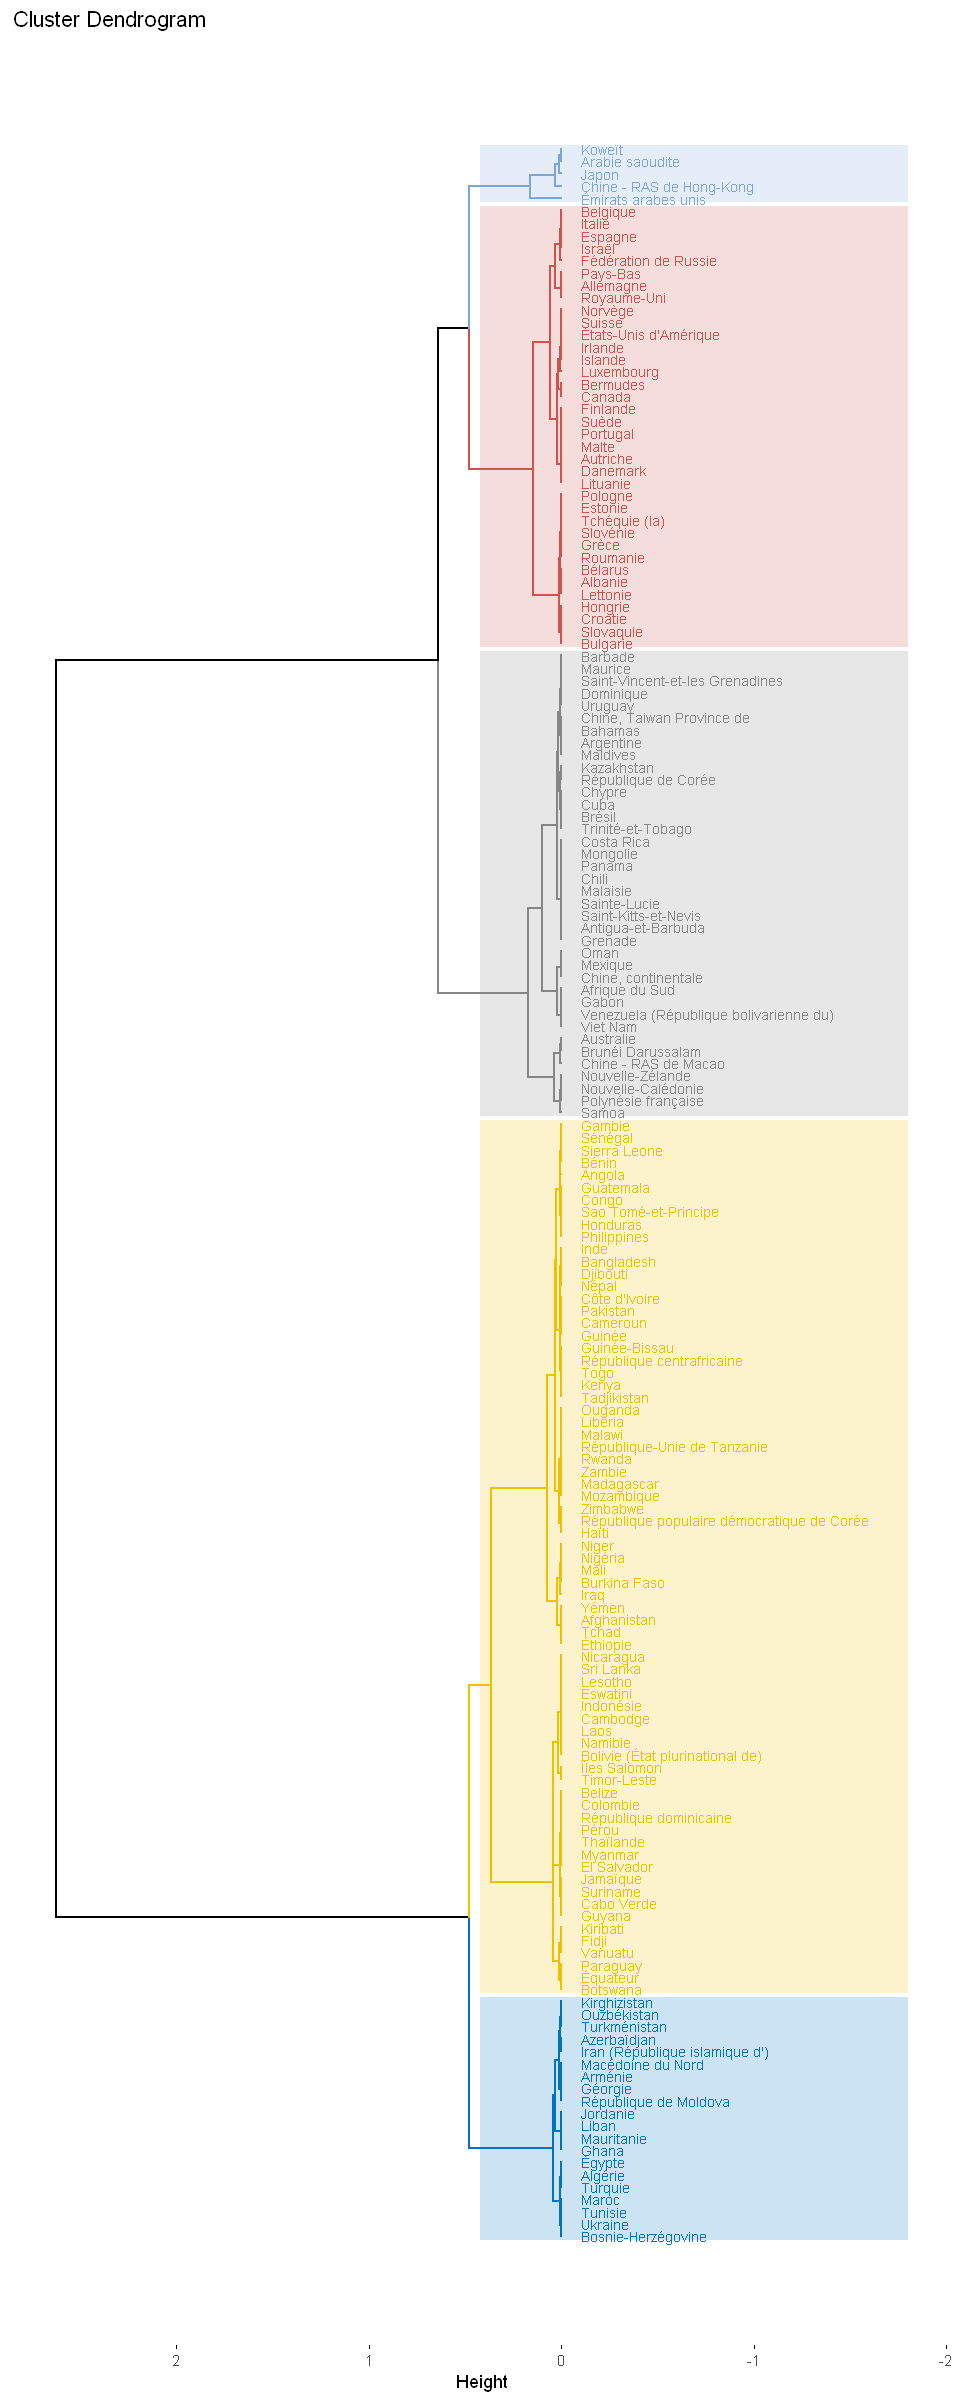

In [50]:
options(repr.plot.width = 8, repr.plot.height = 20)
fviz_dend(res.hcpc1, 
          cex = 0.6,                      # Taille du texte
          palette = "jco",                # Palette de couleur ?ggpubr::ggpar
          rect = TRUE, rect_fill = TRUE,  # Rectangle autour des groupes
          rect_border = "jco",            # Couleur du rectangle
          labels_track_height = 1.3,      # Augmente l'espace pour le texte
          horiz = TRUE                    # Pivote de 45° le dend.   
          )
dev.print(jpeg, filename = "Dendrogramme (1ère analyse).jpg",
          quality = 100, units = "px", width = 1000, height = 2000, res = 100)

### <span style='color:blue'>b) Analyse de la classification:<a name="M2122"></a>

In [51]:
# Individus les plus proches du centre de gravité de leurs classses (parangon) et 
# individus spécifiques les plus éloignés des centres de gravité des autres classes:
res.hcpc1$desc.ind

$para
Cluster: 1
        Sierra Leone              Sénégal Sao Tomé-et-Principe 
          0.03628692           0.34712025           0.39593988 
         Tadjikistan                Congo 
          0.40969902           0.46532075 
------------------------------------------------------------ 
Cluster: 2
                   Azerbaïdjan Iran (République islamique d') 
                     0.1991854                      0.4829277 
             Macédoine du Nord                   Turkménistan 
                     0.5625371                      0.6537963 
                  Kirghizistan 
                     0.6822041 
------------------------------------------------------------ 
Cluster: 3
               Chili Saint-Kitts-et-Nevis   Antigua-et-Barbuda 
           0.1892047            0.1996480            0.3385556 
          Costa Rica         Sainte-Lucie 
           0.3628176            0.3703005 
------------------------------------------------------------ 
Cluster: 4
         Koweït     

CCL:<br/>
- La classe 1 est bien représentée par le Sierrra Leone, etc.
- Le pays des EAU est très éloigné des centres de gravité des autres classes: il est donc exclusif au cluster 4.

In [52]:
res.hcpc1$desc.var


Link between the cluster variable and the quantitative variables
                                         Eta2      P-value
Dispo.prot.en.qtt.(g/pers/jr)       0.7391994 4.342471e-47
Prot.origine.animale/qtt.totale.(%) 0.7282107 1.288395e-45
Dispo.alim.(Kcal/pers/jr)           0.6892036 7.791923e-41
PIB/hab.PPA.(I$)                    0.6051204 2.601641e-32
Distances.(km)                      0.5714081 2.119052e-29
Stabilité.politique.(indice)        0.5049120 2.762315e-24
Importations.(milliers.de.tonnes)   0.3518804 8.691735e-15
Evolution.population.(%)            0.3135013 8.952492e-13

Description of each cluster by quantitative variables
$`1`
                                       v.test Mean in category  Overall mean
Evolution.population.(%)             4.482333       24.2627869  1.603929e+01
Distances.(km)                       2.307906     7100.9672131  6.176700e+03
Importations.(milliers.de.tonnes)   -2.868119       26.5293609  8.071348e+01
PIB/hab.PPA.(I$)                   

CCL:<br/>
- Il y a une très forte corrélation entre l'ensemble des variables de classes et les variables quantitatives, confirmée par les valeurs de significativité.
- L'observation des moyennes de chaque variable de classes par rapport aux moyennes générales de toutes les classes permet déjà de supposer les situations économiques et politiques de chaque classe et/ou des situations économiques.

In [53]:
res.hcpc1$desc.axes


Link between the cluster variable and the quantitative variables
           Eta2      P-value
Dim.1 0.8611077 1.344369e-69
Dim.3 0.5265849 7.166088e-26
Dim.2 0.5068496 2.006304e-24

Description of each cluster by quantitative variables
$`1`
         v.test Mean in category  Overall mean sd in category Overall sd
Dim.1 -10.49943        -2.095771 -1.160836e-15      0.6410598   1.941212
           p.value
Dim.1 8.689893e-26

$`2`
         v.test Mean in category Overall mean sd in category Overall sd
Dim.3 -3.483643       -0.6427045 4.619569e-16      0.6940918   1.019123
Dim.2 -4.569437       -0.9287426 7.012058e-16      0.7346875   1.122746
           p.value
Dim.3 4.946379e-04
Dim.2 4.890361e-06

$`3`
        v.test Mean in category Overall mean sd in category Overall sd
Dim.2 8.648916          1.32496 7.012058e-16      0.8013145   1.122746
           p.value
Dim.2 5.199069e-18

$`4`
        v.test Mean in category  Overall mean sd in category Overall sd
Dim.3 8.718499         3.075653

CCL: Permet d'apprécier déjà la position de chaque classe sur les axes dont elle est la plus corrélée.

CCL:<br/>
Après observation des clusters, des variables et de la corrélation de ses composantes, on peut supposer que:<br/>
- Le 1er cluster semble correspondre aux pays les moins avancées et politiquement instables.<br/>
- Le 2ème semble correspondre aux pays du Proche-Orient et du Monde Arabe.<br/>
- Le 3ème semble correspondre majoritairement aux pays situés autour de l'océan Pacifique.<br/>
- Le 4ème semble correspondre à des pays très riches, hors de l'Europe et de croissance démographique forte.<br/>
- Le 5ème semble correspondre majoritairement aux pays européens.

On aurait donc tendance a priori à cibler l'analyse vers les classes 4 et 5. 

### <span style='color:blue'>c) Caractérisation des clusters.<a name="M2123"></a>

In [54]:
str(res.hcpc1$data.clust)

'data.frame':	170 obs. of  9 variables:
 $ Evolution population (%)           : num  32.17 12.6 -2.04 18.8 -1.27 ...
 $ Dispo alim (Kcal/pers/jr)          : num  2096 2993 3116 3207 3511 ...
 $ Dispo prot en qtt (g/pers/jr)      : num  58.4 83.2 108 88.9 102.2 ...
 $ Prot origine animale/qtt totale (%): num  20.7 41.5 52.9 27.1 60.6 31 69.1 42.4 64.8 46.8 ...
 $ PIB/hab PPA (I$)                   : num  1762 12273 11428 13805 44760 ...
 $ Importations (milliers de tonnes)  : num  36.6 302.2 25.6 2 766.4 ...
 $ Stabilité politique (indice)       : num  -2.61 -0.19 0.4 -1.08 0.72 -0.36 0.9 -0.5 0.1 -0.48 ...
 $ Distances (km)                     : num  5594 9307 1604 1345 881 ...
 $ clust                              : Factor w/ 5 levels "1","2","3","4",..: 1 3 5 2 5 1 3 4 3 2 ...


CCL: La colonne 'clust' est une variable factor

Attribution de noms aux différents clusters selon la position principale des pays composant le cluster et/ou leurs situations économiques:


In [55]:
levels(res.hcpc1$data.clust$clust) <- c('Pays en développement', 'Proche-Orient et Monde Arabe', 'Ocean Pacifique', 'Pays les plus riches', 'Pays européens')
res.hcpc1$data.clust$clust[res.hcpc1$data.clust$clust == 1] <- 'Pays en développement'
res.hcpc1$data.clust$clust[res.hcpc1$data.clust$clust == 2] <- 'Proche-Orient et Monde Arabe'
res.hcpc1$data.clust$clust[res.hcpc1$data.clust$clust == 3] <- 'Ocean Pacifique'
res.hcpc1$data.clust$clust[res.hcpc1$data.clust$clust == 4] <- 'Pays les plus riches'
res.hcpc1$data.clust$clust[res.hcpc1$data.clust$clust == 5] <- 'Pays européens'
res.hcpc1$data.clust$clust <- droplevels(res.hcpc1$data.clust$clust)

In [56]:
res.hcpc1$data.clust

,Evolution population (%),Dispo alim (Kcal/pers/jr),Dispo prot en qtt (g/pers/jr),Prot origine animale/qtt totale (%),PIB/hab PPA (I$),Importations (milliers de tonnes),Stabilité politique (indice),Distances (km),clust
Afghanistan,32.17,2096.4,58.4,20.7,1762.500,36.600000,-2.610000,5594,Pays en développement
Afrique du Sud,12.60,2993.2,83.2,41.5,12273.440,302.200000,-0.190000,9307,Ocean Pacifique
Albanie,-2.04,3115.6,108.0,52.9,11427.560,25.600000,0.400000,1604,Pays européens
Algérie,18.80,3207.4,88.9,27.1,13805.120,2.000000,-1.080000,1345,Proche-Orient et Monde Arabe
Allemagne,-1.27,3511.4,102.2,60.6,44760.020,766.400000,0.720000,881,Pays européens
Angola,39.24,2382.4,54.8,31.0,6297.340,270.400000,-0.360000,6479,Pays en développement
Antigua-et-Barbuda,11.11,2343.4,82.5,69.1,22253.020,6.600000,0.900000,6711,Ocean Pacifique
Arabie saoudite,26.16,3151.6,88.8,42.4,49632.400,748.800000,-0.500000,4687,Pays les plus riches
Argentine,9.15,3174.8,100.6,64.8,18810.180,7.600000,0.100000,11025,Ocean Pacifique
Arménie,-1.94,2837.0,86.4,46.8,8441.400,33.400000,-0.480000,3439,Proche-Orient et Monde Arabe


In [57]:
write.csv(res.hcpc1$data.clust['clust'], 'Liste des pays + nom des clusters (1ère analyse).csv')

In [58]:
# Nombre de pays par clusters:
res.hcpc1$data.clust %>% group_by(clust) %>% count

clust,n
Pays en développement,61
Proche-Orient et Monde Arabe,26
Ocean Pacifique,41
Pays les plus riches,8
Pays européens,34


Remarque:<br/>On peut observer une différence entre les groupes formés par la classification hiérarchique et le nombre d'individus appartenant à chaque cluster.<br/> Ceci est dû au fait que le découpage de l'arbre est suivi par défaut d'une consolidation des classes par la méthode de k-means, pour que les groupes soient le plus homogène possible.

### <span style='color:blue'>d) Centroïdes et carte de chaleur.<a name="M2124"></a>

In [59]:
clusters <- res.hcpc1$data.clust %>% group_by(clust) %>% summarise_all(mean)
clusters

clust,Evolution population (%),Dispo alim (Kcal/pers/jr),Dispo prot en qtt (g/pers/jr),Prot origine animale/qtt totale (%),PIB/hab PPA (I$),Importations (milliers de tonnes),Stabilité politique (indice),Distances (km)
Pays en développement,24.262787,2404.623,60.56066,25.73770,4528.892,26.52936,-0.6966737,7100.967
Proche-Orient et Monde Arabe,10.372692,3002.723,85.40769,38.89231,12657.357,59.88462,-0.5238462,3355.538
Ocean Pacifique,11.298049,2823.483,81.92439,53.84146,19600.772,39.94146,0.6246017,9934.220
Pays les plus riches,44.790000,3101.750,97.58750,53.33750,55271.827,535.82500,0.4337500,7275.500
Pays européens,4.571176,3361.076,105.19412,59.01176,39450.253,135.93529,0.6526471,1886.147


In [60]:
str(clusters)

tibble [5 x 9] (S3: tbl_df/tbl/data.frame)
 $ clust                              : Factor w/ 5 levels "Pays en développement",..: 1 2 3 4 5
 $ Evolution population (%)           : num [1:5] 24.26 10.37 11.3 44.79 4.57
 $ Dispo alim (Kcal/pers/jr)          : num [1:5] 2405 3003 2823 3102 3361
 $ Dispo prot en qtt (g/pers/jr)      : num [1:5] 60.6 85.4 81.9 97.6 105.2
 $ Prot origine animale/qtt totale (%): num [1:5] 25.7 38.9 53.8 53.3 59
 $ PIB/hab PPA (I$)                   : num [1:5] 4529 12657 19601 55272 39450
 $ Importations (milliers de tonnes)  : num [1:5] 26.5 59.9 39.9 535.8 135.9
 $ Stabilité politique (indice)       : num [1:5] -0.697 -0.524 0.625 0.434 0.653
 $ Distances (km)                     : num [1:5] 7101 3356 9934 7276 1886


In [61]:
reduction <- clusters %>% as.data.frame %>% select(-clust) %>% scale
centroides <- cbind(clusters['clust'], reduction)
centroides

clust,Evolution population (%),Dispo alim (Kcal/pers/jr),Dispo prot en qtt (g/pers/jr),Prot origine animale/qtt totale (%),PIB/hab PPA (I$),Importations (milliers de tonnes),Stabilité politique (indice),Distances (km)
Pays en développement,0.3235473,-1.4993349,-1.49744169,-1.4961530,-1.0508155,-0.6204276,-1.2134700,0.3665485
Proche-Orient et Monde Arabe,-0.5400644,0.1796367,-0.04257835,-0.5326324,-0.6585156,-0.4649393,-0.9495934,-0.7866556
Ocean Pacifique,-0.4825307,-0.3235217,-0.24653541,0.5623318,-0.3234092,-0.5579060,0.8038798,1.2388967
Pays les plus riches,1.5998194,0.4576226,0.67058338,0.5254185,1.3981644,1.7536957,0.5124836,0.4202865
Pays européens,-0.9007716,1.1855973,1.11597208,0.9410351,0.6345760,-0.1104229,0.8467000,-1.2390760


Using clust as id variables


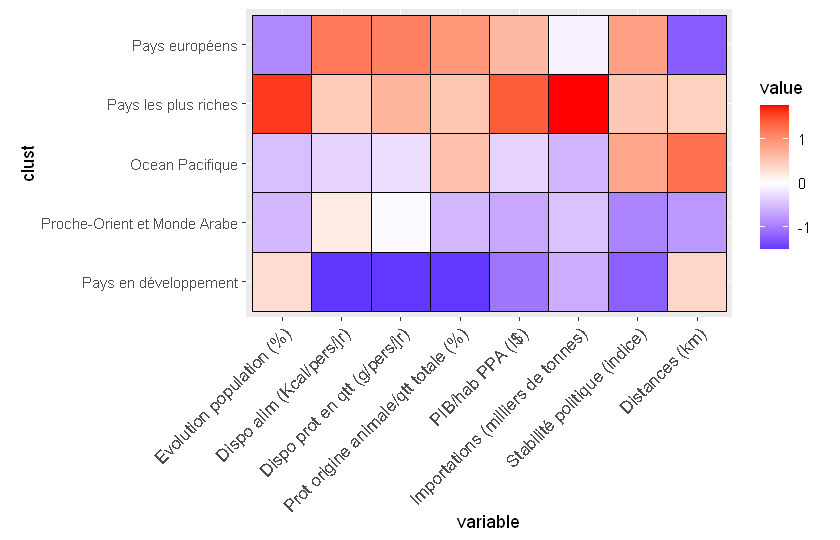

In [62]:
options(repr.plot.width = 7, repr.plot.height = 4.5)
ggplot(melt(centroides), aes(variable, clust)) + geom_tile(aes(fill = value), color = "black") + 
scale_fill_gradient2(low = "blue", high = "red", mid = "white") + 
theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 10, hjust = 1)) + coord_fixed()

CCL: On peut déjà suppposer que l'analyse sera resserer sur les classes "Pays les plus riches" et "Pays européens".

In [63]:
coordonnees <- cbind(clusters['clust'], res.pca1$ind$coord %>% as.data.frame) %>% group_by(clust) %>% summarise_all(mean)
coordonnees

clust,Dim.1,Dim.2,Dim.3
Pays en développement,-0.53315040,0.02088198,0.034606383
Proche-Orient et Monde Arabe,0.36728940,0.02845874,-0.244661001
Ocean Pacifique,0.01691969,-0.15536348,0.015282541
Pays les plus riches,-0.02166821,0.06933456,-0.006610168
Pays européens,0.17060952,0.03668820,0.201382244


In [64]:
livrable_centroides <- cbind(centroides, coordonnees)
write.csv(livrable_centroides, 'Centroïdes (1ère analyse).csv')

## <span style='color:purple'>3. Analyse des composantes principales.<a name="M213"></a>
### <span style='color: blue'>a) Qualité de représentation des variables sur la carte de l'ACP:<a name="M2131"></a>

In [65]:
var1 <- get_pca_var(res.pca1)
var1

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

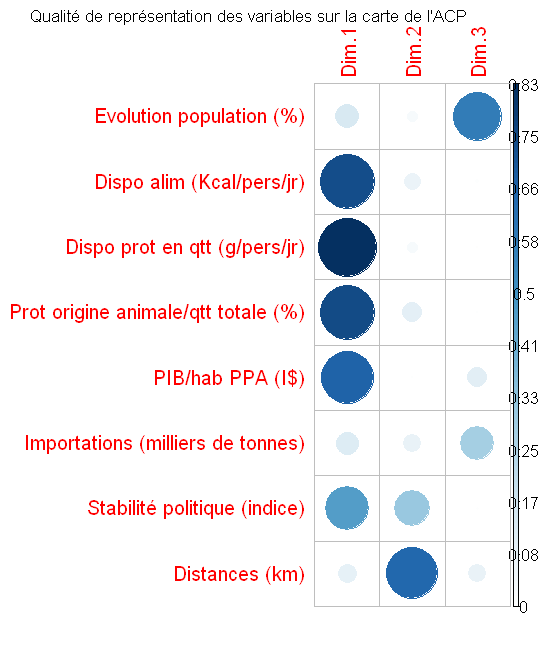

In [66]:
options(repr.plot.width = 4.5, repr.plot.height = 5.5)
corrplot(var1$cos2, is.corr = FALSE)
mtext('Qualité de représentation des variables sur la carte de l\'ACP', at = -0.5, line = 3, cex = 0.85)

CCL:<br/>
- Dispo prot, dispo alim, prot origine/qtt et PIB/hab PPA sont les variables les mieux représentées sur la dimension 1.<br/>
- Distances et Evolution sont celles qui sont les mieux représentées respectivement sur la dimension 2 et la dimension 3.<br/>

- Au minimum 6 variables sont très bien représentées sur chaque plan factoriel de l'ACP.<br/>
- L'analyse du plan factoriel de dimension 1 et 3 mettra en en exergue l'évolution démographique et l'importation, sur la dimension 3 tandis que celle du plan factoriel de dimension 1 et 2 appuiera la distance sur la dimension 2.<br/>
- Il suffira d'observer les plans factoriels des dimensions 1 et 2 ainsi que celui des dimensions 1 et 3 pour cibler les pays recherchées.

En ACP normée, les variables qui sont le mieux représentées sont aussi celles qui contribuent le plus à l’axe et inversement, donc pas besoin d’étude spécifique de la contribution des variables aux axes principaux.

### <span style='color:blue'>b) Contribution des individus aux axes principaux:<a name="M2132"></a>

In [67]:
ind <- get_pca_ind(res.pca1)
ind

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

In [68]:
summary(ind$contrib)

     Dim.1              Dim.2              Dim.3         
 Min.   :0.000033   Min.   :0.000032   Min.   : 0.00000  
 1st Qu.:0.086405   1st Qu.:0.058546   1st Qu.: 0.02284  
 Median :0.398027   Median :0.229936   Median : 0.11834  
 Mean   :0.588235   Mean   :0.588235   Mean   : 0.58824  
 3rd Qu.:0.934796   3rd Qu.:0.685360   3rd Qu.: 0.36493  
 Max.   :3.273972   Max.   :5.111586   Max.   :37.18629  

CCL: Un individu contribue à plus de 37% de l'axe 3.

### <span style='color:blue'>c) Premier plan factoriel:<a name="M2133"></a>
### <span style='color:orange'>i) Graphique des variables:<a name="M21331"></a>

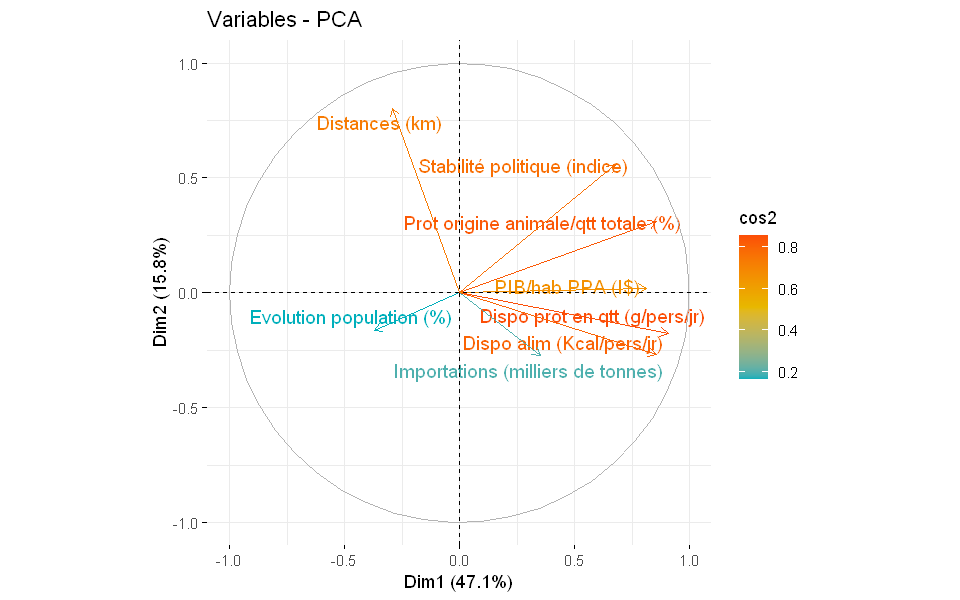

In [69]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_pca_var(res.pca1,
             col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

CCL:<br/>
- PIB/hab, Dispo prot en qtt, Dispo alim et Prot origine animal/qtt totale sont très corrélés à la dimension 1: La première composante semble correspondre à la richesse du pays, où la nourriture est disponible en quantité et riche en protéine.
- Stabilité politique semble corrélée aux deux dimensions.
- La deuxième composante semble correspondre à l'éloignement du pays par rapport à la France.<br/>

On cherche donc des pays dans la partie droite de préférence autour de l'axe 1, voire dans le quart haut droite pour bénéficier de la stabilité politique mais pas trop pour ne pas avoir trop de distances avec la France.

### <span style='color:orange'>ii) Visualisation des partitions dans le premier plan factoriel obtenu par l'ACP:<a name="M21332"></a>

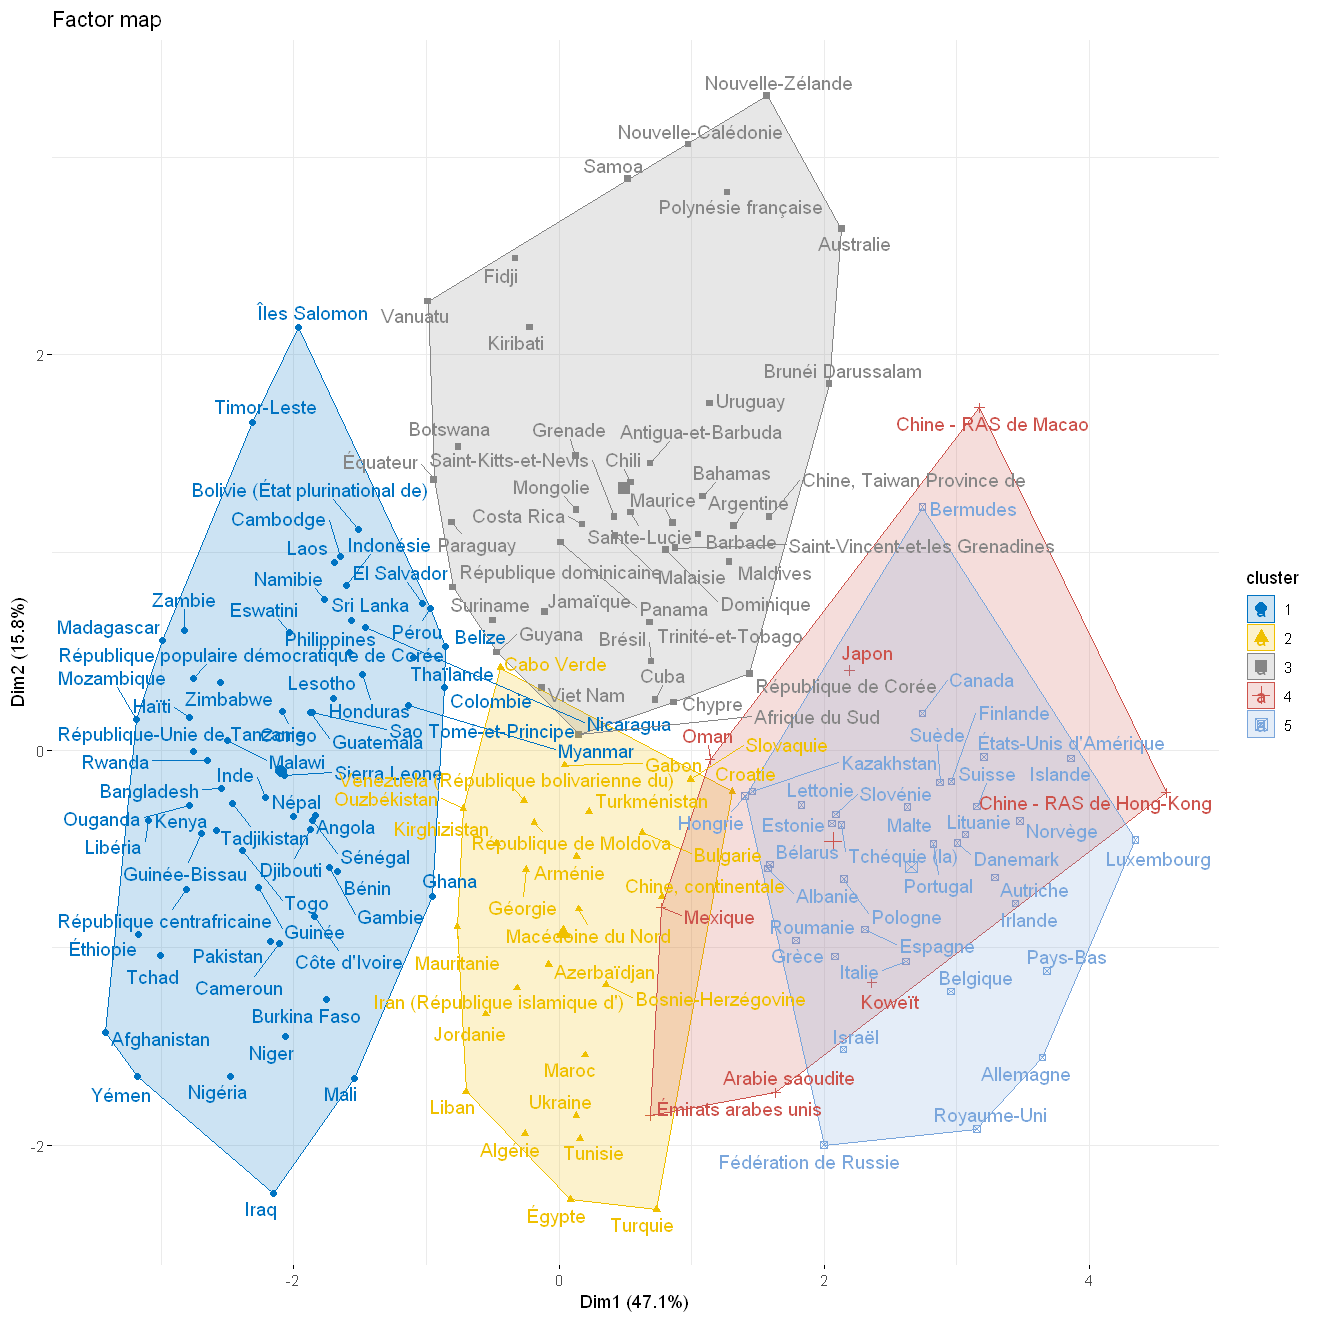

In [70]:
options(repr.plot.width = 11, repr.plot.height = 11)
fviz_cluster(res.hcpc1,
             geom.ind = 'point',
             repel = TRUE,            # Evite le chevauchement des textes
             show.clust.cent = TRUE, # Montre le centre des clusters
             palette = "jco",         # Palette de couleurs, voir ?ggpubr::ggpar
             ggtheme = theme_minimal(),
             main = "Factor map"
             )

CCL: Ce plan factoriel et les conclusions dégagées des graphiques des variables tendent à confirmer a priori l'analyse sur les classes "Pays les plus riches" (cluster 4) et "Pays européens" (cluster 5).

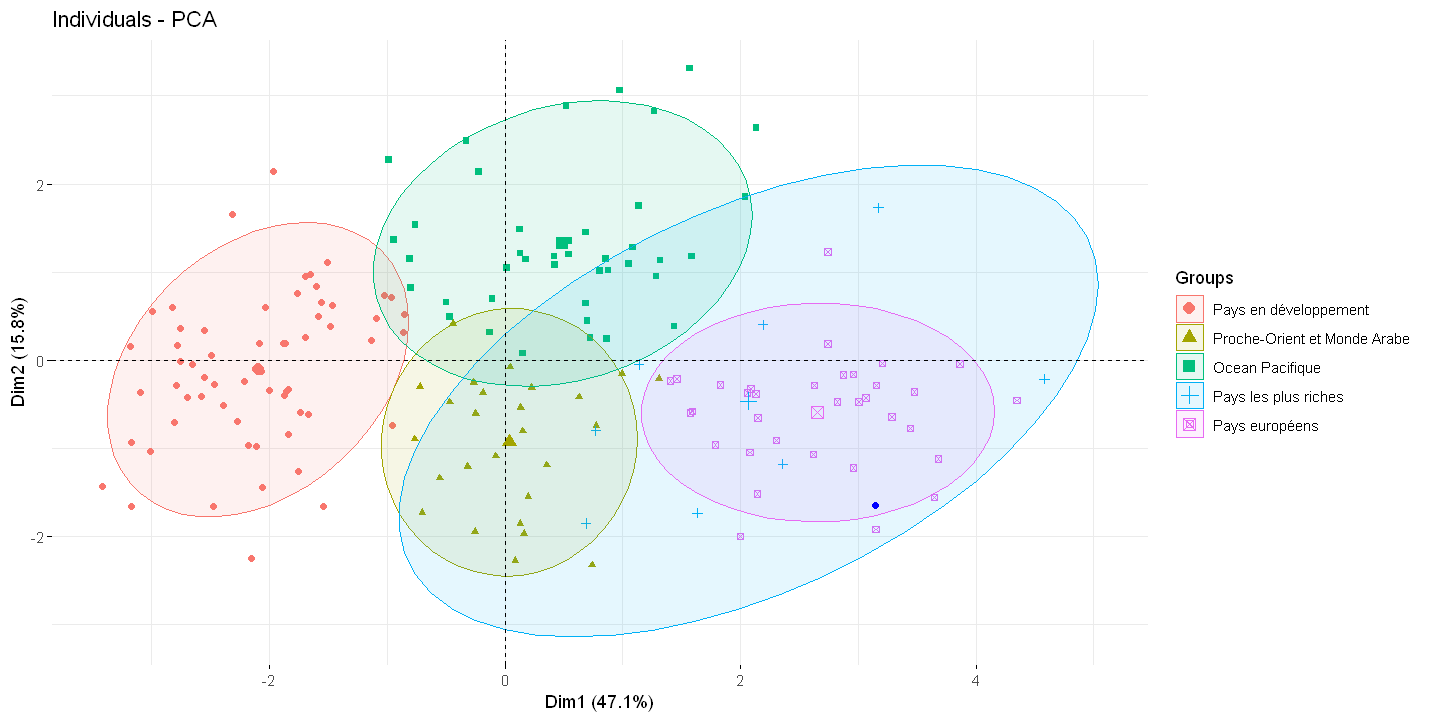

In [71]:
options(repr.plot.width = 12, repr.plot.height = 6)
fviz_pca_ind (res.pca1,
              geom = c('point'),
              habillage = res.hcpc1$data.clust$clust,
              addEllipses = TRUE,
              ellipse.level = 0.85,
              repel = TRUE, # Évite le chevauchement de texte
              )

CCL:<br/>
- On peut voir ls clusters "Pays les plus riches" et "Pays européens" situés principalement à cheval sur l'axe 1 et "Pays en développement" à l'opposé, ce qui confirme l'idée que l'axe 1 est un axe de richesse du pays (croissance économique et nourriture en abondance).<br/>
- Le cluster "Pays les plus riches" est relativement dispersé, survolant quasiment un quart de la surface du graphique.<br/>
- Deuxième axe, l'hypothèse de distance à la France se confirme avec le cluster intitulé Océan Pacifique assez haut sur l'axe 2. (le point bleu représente la France).

Il faut donc ici cibler de préférence la zone de droite et milieu/bas.

### <span style='color:blue'>d) Deuxième plan factoriel:<a name="M2134"></a>

### <span style='color:orange'>i) Graphique des variables:<a name="M21341"></a>

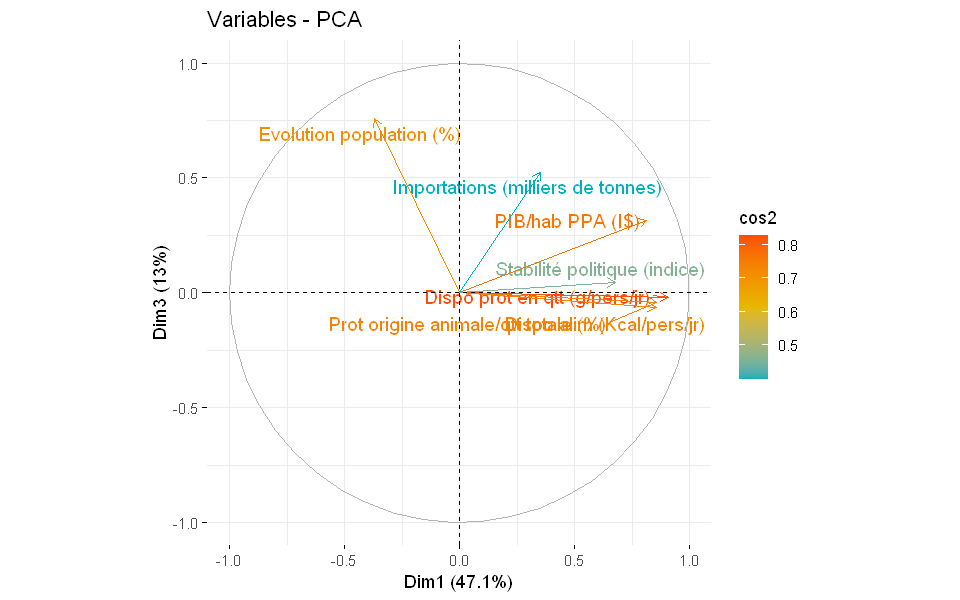

In [72]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_pca_var(res.pca1,
             axes = c(1, 3),
             select.var = list(cos2 = 7),
             col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Évite le chevauchement de texte
             )

CCL:<br/>
L'évolution démographique est relativement bien représentée et corrélée à la troisième dimension.<br/>
De même, l'importation, bien que sa qualité de représentation soit plus faible, semble plus corrélée à la troisième dimension qu'à la première.<br/>
Il semble intéressant de regarder les pays dans la partie droite-milieu. 

### <span style='color:orange'>ii) Partitions des 85 pays à plus forte contribution dans le deuxième plan factoriel:<a name="M21342"></a>

Too few points to calculate an ellipse
Too few points to calculate an ellipse


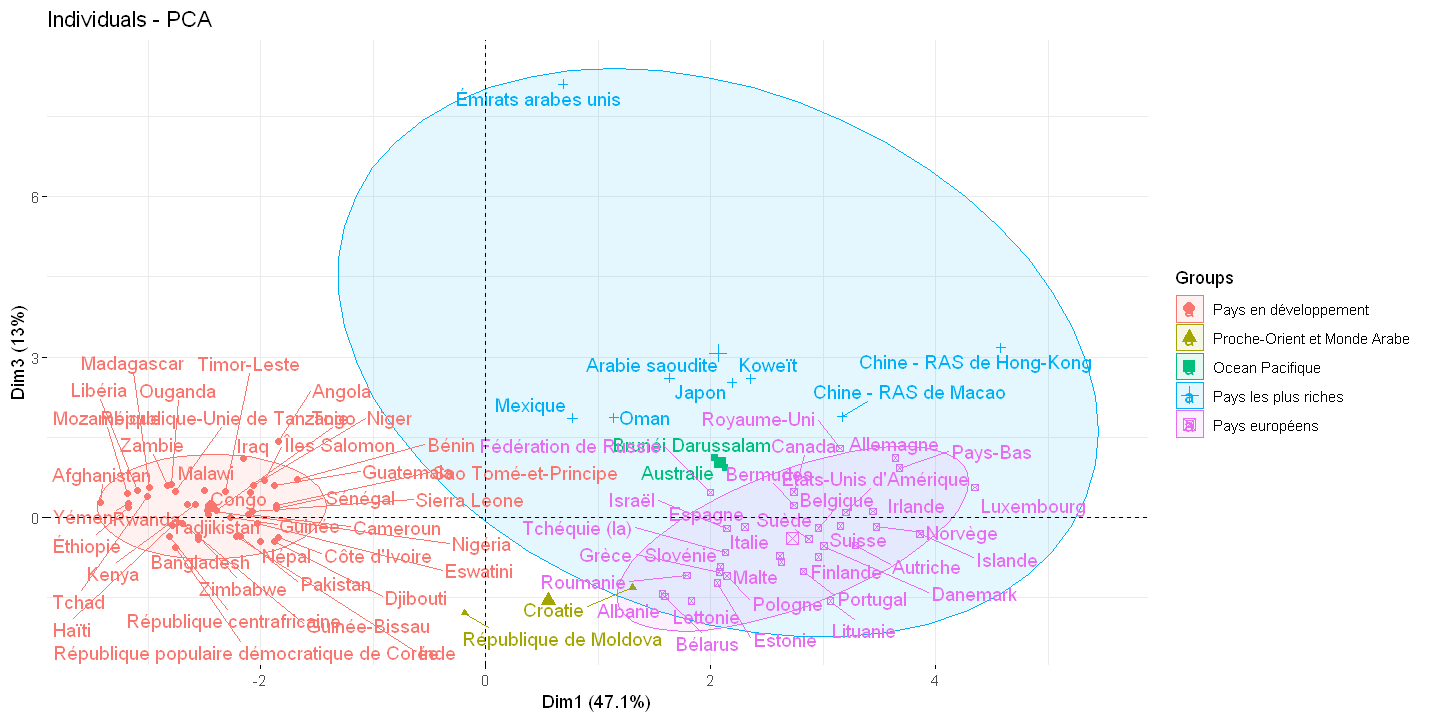

In [73]:
options(repr.plot.width = 12, repr.plot.height = 6)
fviz_pca_ind (res.pca1,
              geom = c('point', 'text'),
              axes = c(1, 3),
              col.ind.sup = 'black',
              habillage = res.hcpc1$data.clust$clust,
              addEllipses = TRUE,
              ellipse.level = 0.9,
              select.ind = list(contrib = 85),
              repel = TRUE
              )

In [74]:
ind$contrib['Émirats arabes unis','Dim.3']

[1] 37.18629

In [75]:
mean(ind$contrib[,'Dim.3'])

[1] 0.5882353

In [76]:
echantillon['Émirats arabes unis', ]

,Evolution population (%),Dispo alim (Kcal/pers/jr),Dispo prot en qtt (g/pers/jr),Prot origine animale/qtt totale (%),PIB/hab PPA (I$),Importations (milliers de tonnes),Stabilité politique (indice),Distances (km)
Émirats arabes unis,177.41,3210.2,101.8,39.5,65814.92,341.4,0.68,5252


CCL: Le pays des EAU contribue quasiment à lui seul à l'axe d'inertie 3. C'est donc un outlier.<br/>
Il est situé très loin de tous les autres  et a tendance à « attirer » dans sa direction l’un des axes d’inertie.<br/>
Cet outlier ne présente pas d'aspect indispensable dans l'analyse.<br/>
Il suffit alors de ne pas analyser l’axe auquel il contribue fortement, et d’analyser que les autres, à savoir les axes 1 et 2 soit le 1er plan factoriel.

L'analyse se poursuit donc sur le cluster "Pays européens" uniquement.

## <span style='color:red'>B. Deuxième analyse.<a name="M22"></a>

In [77]:
head(res.hcpc1$data.clust)

,Evolution population (%),Dispo alim (Kcal/pers/jr),Dispo prot en qtt (g/pers/jr),Prot origine animale/qtt totale (%),PIB/hab PPA (I$),Importations (milliers de tonnes),Stabilité politique (indice),Distances (km),clust
Afghanistan,32.17,2096.4,58.4,20.7,1762.50,36.6,-2.61,5594,Pays en développement
Afrique du Sud,12.60,2993.2,83.2,41.5,12273.44,302.2,-0.19,9307,Ocean Pacifique
Albanie,-2.04,3115.6,108.0,52.9,11427.56,25.6,0.40,1604,Pays européens
Algérie,18.80,3207.4,88.9,27.1,13805.12,2.0,-1.08,1345,Proche-Orient et Monde Arabe
Allemagne,-1.27,3511.4,102.2,60.6,44760.02,766.4,0.72,881,Pays européens
Angola,39.24,2382.4,54.8,31.0,6297.34,270.4,-0.36,6479,Pays en développement


Cette deuxième analyse portera cette fois-ci uniquement sur les 4 dernières variables, afin de ne pas tomber dans la redondance des critères importants de sélection de notre première analyse et ainsi mettre en exergue la caractérisation du cluster choisi par le choix des variables rajoutées au départ.    

In [78]:
# Sélection du cluster "Pays européens" pour une deuxième analyse:
pays_proches <- res.hcpc1$data.clust[res.hcpc1$data.clust[, 9] ==  'Pays européens', ]
pays_proches <- pays_proches[, c(5:8)]
dim(pays_proches)
head(pays_proches)

[1] 34  4

,PIB/hab PPA (I$),Importations (milliers de tonnes),Stabilité politique (indice),Distances (km)
Albanie,11427.56,25.6,0.40,1604
Allemagne,44760.02,766.4,0.72,881
Autriche,45027.54,101.0,1.09,1037
Bélarus,17370.14,16.2,0.12,1832
Belgique,42275.70,218.4,0.54,265
Bermudes,85700.00,4.4,0.98,5758


### <span style='color:purple'>1) Détermination du nombre de composantes principales.<a name="M221"></a>
### <span style='color:blue'>Etude de l'inertie:<a name="M2211"></a>

In [79]:
res.pca2 <- PCA(pays_proches, ncp = 4, scale.unit = TRUE, graph = F)

In [80]:
eig.val2 <- get_eigenvalue(res.pca2)
eig.val2

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,1.6030262,40.075654,40.07565
Dim.2,1.1510108,28.775270,68.85092
Dim.3,0.9003959,22.509897,91.36082
Dim.4,0.3455671,8.639179,100.00000


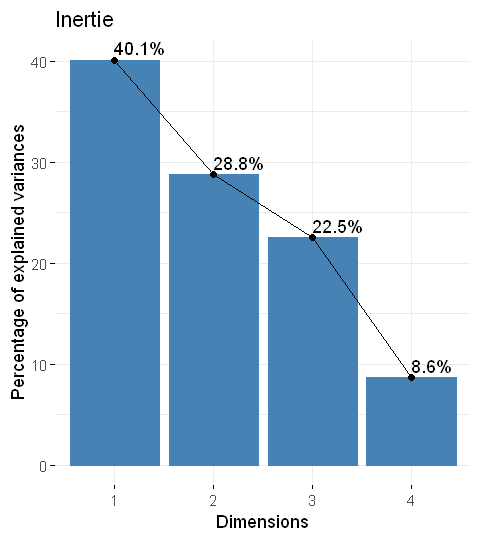

In [81]:
options(repr.plot.width = 4, repr.plot.height = 4.5)
fviz_eig(res.pca2, addlabels = TRUE, main = 'Inertie')

CCL: On continue l'analyse sur les 2 premières dimensions.

In [82]:
res.pca2 <- PCA(pays_proches, ncp = 2, scale.unit = TRUE, graph = F)

In [83]:
res.hcpc2 <- HCPC(res.pca2, nb.clust = 5)

### <span style='color:purple'>2) Classification ascendante hiérarchique.<a name="M222"></a>
### <span style='color:blue'>a) Dendrogramme:<a name="M2221"></a>

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 6)
fviz_dend(res.hcpc2, 
          cex = 0.6,                      # Taille du texte
          palette = "jco",                # Palette de couleur ?ggpubr::ggpar
          rect = TRUE, rect_fill = TRUE,  # Rectangle autour des groupes
          rect_border = "jco",            # Couleur du rectangle
          labels_track_height = 1.3,      # Augmente l'espace pour le texte
          horiz = TRUE                    # Pivote de 45° le dend.   
          )
dev.print(jpeg, filename = "Dendrogramme (2ème analyse).jpg",
          quality = 100, units = "px", width = 500, height = 700, res = 100)

In [ ]:
res.hcpc2$data.clust %>% group_by(clust) %>% count 

### <span style='color:blue'>b) Analyse de la classification:<a name="M2222"></a>

In [ ]:
# Parangon et représentant caractéristique de chaque cluster:
res.hcpc2$desc.ind

In [ ]:
res.hcpc2$desc.var

In [ ]:
res.hcpc2$desc.axes

### <span style='color:blue'>c) Caractérisation des clusters:<a name="M2223"></a>

In [ ]:
# Atribut des noms de clusters selon leurs positions géographiques:
levels(res.hcpc2$data.clust$clust) <- c('Europe de l\'Est', 'Europe de l\'Ouest', 'Europe centrale', 'Amériques', 'Europe du Nord')
res.hcpc2$data.clust$clust[res.hcpc2$data.clust$clust == 1] <- 'Europe de l\'Est'
res.hcpc2$data.clust$clust[res.hcpc2$data.clust$clust == 2] <- 'Europe de l\'Ouest'
res.hcpc2$data.clust$clust[res.hcpc2$data.clust$clust == 3] <- 'Europe centrale'
res.hcpc2$data.clust$clust[res.hcpc2$data.clust$clust == 4] <- 'Amériques'
res.hcpc2$data.clust$clust[res.hcpc2$data.clust$clust == 5] <- 'Europe du Nord'
res.hcpc2$data.clust$clust <- droplevels(res.hcpc2$data.clust$clust)

In [ ]:
res.hcpc2$data.clust

In [ ]:
write.csv(res.hcpc2$data.clust['clust'], 'Liste des pays + nom des clusters (2ème analyse).csv')

### <span style='color:blue'>d) Centroïdes et cartes de chaleur:<a name="M2224"></a>

In [ ]:
clusters2 <- res.hcpc2$data.clust %>% group_by(clust) %>% summarise_all(mean)
clusters2

In [ ]:
reduction2 <- clusters2 %>% as.data.frame %>% select(-clust) %>% scale
centroides2 <- cbind(clusters2['clust'], reduction2)
centroides2

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 4.5)
ggplot(melt(centroides2), aes(variable, clust)) + geom_tile(aes(fill = value), color = "black") + 
scale_fill_gradient2(low = "blue", high = "red", mid = "white") + 
theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 10, hjust = 1)) + coord_fixed()

CCL:<br/>Deux choix s'offrent à nous:
- La classe "Europe de l'Ouest" semble être la cible la plus intéressante de part la couleur de sa case "Importations".
- La classe "Europe du Nord" de part son PIB/hab et sa stabilité politique peut être une cible à envisager.

In [ ]:
res.hcpc2$desc.ind

In [ ]:
coordonnees2 <- cbind(res.hcpc2$data.clust['clust'], res.pca2$ind$coord %>% as.data.frame) %>% group_by(clust) %>% summarise_all(mean)
coordonnees2

In [ ]:
livrable_centroides2 <- cbind(centroides2, coordonnees2)
write.csv(livrable_centroides2, 'Centroïdes (2ème analyse).csv')

### <span style='color:purple'>3. Analyse des composantes principales.<a name="M223"></a>
### <span style='color:blue'>Premier plan factoriel:<a name="M2231"></a>
### <span style='color:orange'>i) Graphique des variables:<a name="M22311"></a>

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 5)
fviz_pca_var(res.pca2,
             col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

CCL:<br/>le PIB/hab PPA et la stabilité politique sont très corrélés à la première composante: elle représente donc la richesse intérieur, le pouvoir d'achat et la stablité politique d'un pays.<br/>
La deuxième composante est représentée par la distance à la France, mais également par l'importation de poulet, par corrélation négative sur l'axe: plus un pays est situé haut sur l'axe 2, plus il est loin de la France et moins en parallèle, il importe du poulet.

Il faudra donc rechercher des pays plutôt situés dans la zone basse milieu/droite, dessinée par l'arc de cercle situé entre les vecteurs Importations et PIB/hab positif, de préférence le plus loin possible du centre des axes.

### <span style='color:orange'>ii) Visualisation des partitions dans le premier plan factoriel obtenu par l'ACP:<a name="M22312"></a>

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 6)
fviz_pca_ind (res.pca2,
              habillage = res.hcpc2$data.clust$clust,
              addEllipses = TRUE,
              ellipse.level = 0.9,
              repel = TRUE, # Évite le chevauchement de texte
              )

CCL:<br/>
- 1ère solution:<br/>
On remarque très facilement l'Allemagne, le Royaume-Uni et les Pays-Bas dans la zone recherchée.<br/>
La situation politique actuelle de l'Angleterre peut éventuellement infirmer le choix de traiter commercialement avec ce dernier.<br/>On pourra donc de façon définitive se concentrer exclusivement sur l'Allemagne et les Pays-Bas.


- 2ème solution:<br/>
Le Luxembourg et la Suisse sont potentiellement des choix à privilégier.

## III Tests statistiques.<a name="M3"></a>
### <span style='color:red'>A. Test d'adéquation.<a name="M31"></a>

In [ ]:
test <- res.hcpc1$data.clust %>% select(-clust, -c(8))
head(test)

### <span style='color:blue'>1. Répartion des pays pour chaque variable centrée et réduite:<a name="M311"></a>

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 5)
par(mar = par("mar") + c(-2, 9, -2, 0)) # modifie la marge autour du graphe
test %>% scale %>% boxplot(horizontal = TRUE,
                                  col = "#066FFF",
                                  las = 1,  # pivote de 90° les labels
                                  cex.axis = 0.9,
                                  main = 'Répartion des pays pour chaque variable centrée et réduite',
                                  cex.main = 1,
                                  outline = FALSE, # supprime les outliers
                                  )
grid()

CCL:<br/>La répartition des pays est relativement bien centrée sur les variables Dispo alim, Dispo prot en qtt, Prot origine animale/qtt totale et Stabilité politique.<br/>
Il y a de fortes chance qu'une loi normale s'applique à ces variables (car très bien centrées et quasi symétriques).

### <span style='color:blue'>2. Histogramme de distribution des variables:<a name="M312"></a>

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 5)
par(mfrow = c(2,4))

for (i in seq(1, 7))
{
    hist(test[, c(i)], prob = TRUE, xlab = "", ylab = "", main = names(test)[i], col = "orange")
    abline(v = mean(test[, c(i)]), col = "blue", lwd = 3)
    curve(dnorm(x, mean = mean(test[, c(i)]), sd = sd(test[, c(i)])), col = "red", lwd = 3, add = T)
}

CCL: Visuellement, l’écart entre les histogrammes "Dispo alim", "Dispo prot en qtt", "Prot origine animale/qtt totale" et "Stabilité politique" et leurs densités gaussiennes semblent plutôt proches et confirment notre première supposition.

### <span style='color:blue'>3. Adéquation à la loi normale:<a name="M313"></a>

Partons de l'hypothèse nulle H0 que nos variables sont gaussiennes.<br/>
L'hypothèse alternative H1 étant que la variable n'est pas gaussienne.<br/>
Ce test est bilatéral car H0 est différent de H1.

In [ ]:
nrow(test)

La taille de l'échantillon est supérieur à 50.<br/>
On applique alors dans un premier temps le test de Kolmogorov-Smirnov.

#### <span style='color:red'>Test de Kolmogorov-Smirnov.<a name="M3131"></a>

Nous fixons ici notre seuil de risque alpha à 5%.<br/>
Si la p-value est inférieure au niveau alpha choisi, alors l'hypothèse nulle est rejetée.

In [ ]:
alpha <- 0.05
for (i in seq(1, 7))
{
    if (ks.test(test[, c(i)], "pnorm", mean = mean(test[, c(i)]), sd = sd(test[, c(i)]))$p.value > alpha)
        cat(sprintf('%s: L\'hypothèse nulle H0 est non rejetée (p-value = %s).\n',
                    names(test)[i], round(ks.test(test[, c(i)], "pnorm", mean = mean(test[, c(i)]),
                                                  sd = sd(test[, c(i)]))$p.value, digits = 4)))
}

CCL: Le test confirme avec un degré de significativité supérieur à 5% ce que nous avions supposé visuellement, à savoir que ces quatre variables suivent une loi Gaussienne.

Par le test de Jarque-Bera applicable pour les grands echantillons, nous pouvons aussi vérifier que des variables suivent une loi normale en mesurant si le kurtosis et le coefficient d'asymétrie des données sont les mêmes que ceux d'une loi normale de même espérance et variance.

#### <span style='color:red'>Test de Jarque-Bera.<a name="M3132"></a>

Nous fixons ici notre seuil de risque alpha à 5%.<br/>
Si la p-value est inférieure au niveau alpha choisi, alors l'hypothèse nulle est rejetée.

In [ ]:
alpha <- 0.05
for (i in seq(1, 7))
{
    if (ajb.norm.test(test[, c(i)])$p.value > alpha)
        cat(sprintf('%s: L\'hypothèse nulle H0 est non rejetée (p-value = %s).\n',
                    names(test)[i], round(ajb.norm.test(test[, c(i)])$p.value, digits = 4)))
}

CCL: Ces deux variables suivent donc une loi normale, leurs p-values étant non significatives.

### <span style='color:red'>B. Test de comparaison de deux populations (dans le cas Gaussien).<a name="M32"></a>

On sélectionne ici la variable Gaussienne "Dispo alim (Kcal/pers/jour)"" afin de procéder au test de comparaison de deux populations.

In [ ]:
test2 <- res.hcpc1$data.clust %>% select(c(2), c(9))
head(test2, 10)

Choisissons deux clusters: il semble intéressant, par rapport à notre analyse antérieur, de comparer le cluster "Pays européens" avec le cluster "Pays les plus riches".

Afin d'utiliser les différentes commandes de test de R, création des listes de valeurs de la variable à chaque cluster: 

In [ ]:
europe <- test2[test2[, 2] ==  'Pays européens', ] %>% select(-clust) %>% unlist(use.names=FALSE)
head(europe)

In [ ]:
riches <- test2[test2[, 2] ==  'Pays les plus riches', ] %>% select(-clust) %>% unlist(use.names=FALSE)
head(riches)

### <span style='color:blue'>1. Test de normalité des échantillons:<a name="M321"></a>

Notre variable est Gaussienne sur toute la population de notre échantillon de départ.<br/>
Or ici, nous avons extrait deux clusters de notre échantillon.<br/>
Rien ne dit donc que notre variable est encore Gaussiennne sur nos deux clusters.

Or pour pouvoir utiliser le test de Student indépendant classique, nous devrons nous assurer que:
- les deux groupes d'échantillon à comparer suivent une loi normale.
- les variances sont égales.

Pour tester si les deux clusters ont des distributions qui suivent une loi normale, on observera un diagramme Quantile-Quantile (surtout quand le groupe est petit) et on effectuera un test de Shapiro-Wilk, applicable car les 2 échantillons sont inférieurs à 50:

In [ ]:
# Taille des échantillons:
nrow(test2[test2[, 2] ==  'Pays européens', ])
nrow(test2[test2[, 2] ==  'Pays les plus riches', ])

NB: Le théorème central limite nous dit que la distribution de l’échantillonnage tend à suivre la loi normale lorsque la taille est grand (n > 30).<br/>
Le test sera malgré tout réalisé afin de confirmer la suite des opérations.  

Visuellement:

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 3.5)
par(mfrow = c(1, 2))

qqnorm(europe, cex = 0.6, col = 'blue')
qqline(europe, col = "red")

qqnorm(riches, cex = 0.6, col = 'blue')
qqline(riches, col = "red")

CCL: Les deux échantillon semblent suivre une loi normale.

#### <span style='color:red'>Test de Shapiro-Wilk.<a name="M3211"></a>

Partons de l'hypothèse nulle H0 que la variable est gaussienne dans le cluster.<br/>
L'hypothèse alternative H1 étant que la variable n'est pas gaussienne.<br/>
Ce test est bilatéral car H0 est différent de H1.

Nous fixons ici notre seuil de risque à 1%, afin de ne pas rejeter trop facilement les variables candidates.<br/>
Si la p-value est inférieure à 1%, alors l'hypothèse nulle est rejetée.

In [ ]:
# Test pour le cluster "europe":
alpha <- 0.01
if (shapiro.test(europe)$p.value > alpha)
        cat(sprintf('L\'hypothèse nulle H0 est non rejetée (p-value = %s).\n', 
                    round(shapiro.test(europe)$p.value, digits = 4)))

In [ ]:
# Test pour le cluster "riches":
alpha <- 0.01
if (shapiro.test(riches)$p.value > alpha)
        cat(sprintf('L\'hypothèse nulle H0 est non rejetée (p-value = %s).\n',
                    round(shapiro.test(riches)$p.value, digits = 4)))

Les p-value sont non significatives: on ne peut donc pas rejeter l'hypothèse nulle.<br/>
Les deux clusters suivent donc bien une loi normale: nous pouvons alors procéder maintenant au test de Fisher.

### <span style='color:blue'>2. Test de Fisher - Test d'adéquation de la variance.<a name="M322"></a>

Vérifions si les variances sont similaires.

Hypothèse nulle : Les variances sont égales.<br/>
Hypothèse alternative : Les variances sont différentes.<br/>
Ce test est bilatèral car H0 différent de H1.<br/>
Le seuil de risque alpha est fixé à 5%.

In [ ]:
var.test(europe, riches)

CCL:<br/>La p-value vaut environ 62%, elle est donc non significative: on ne peut donc pas rejeter l'hypothèse nulle.<br/>
Les variances sont donc égales.

Toutes les conditions sont maintenant réunies pour procéder au test de Student indépendant (ou non-apparié).

### <span style='color:blue'>3. Test de Student - Test d'adéquation de la moyenne.<a name="M323"></a>

Hypothèse nulle: Les moyennes sont égales.<br/>
Hypothèse alternative: Les moyennes sont différentes.<br/>
Le test est bilatèral.<br/>
Le seuil de risque alpha est fixé à 1%.

In [ ]:
t.test(europe, riches, paired = F, var.equal = TRUE)

CCL:<br/>En considérant un seuil de risque de 1%, la p-value est alors significative: on peut donc rejeter l'hypothèse nulle.<br/>
Les moyennes sont donc différentes.

On peut donc rejeter l'hypothèse que les disponibilités alimentaires des classes "Pays européens" et "Pays les plus riches" suivent la même distribution.<br/>
Nos partitions différent donc réellement.